<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Проверка-данных-на-аномалии-и-исправления." data-toc-modified-id="Проверка-данных-на-аномалии-и-исправления.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка данных на аномалии и исправления.</a></span></li><li><span><a href="#Удаление-дубликатов." data-toc-modified-id="Удаление-дубликатов.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление дубликатов.</a></span></li><li><span><a href="#Изменение-типов-данных." data-toc-modified-id="Изменение-типов-данных.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Изменение типов данных.</a></span></li><li><span><a href="#Формирование-дополнительных-датафреймов-словарей,-декомпозиция-исходного-датафрейма." data-toc-modified-id="Формирование-дополнительных-датафреймов-словарей,-декомпозиция-исходного-датафрейма.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.</a></span></li><li><span><a href="#Категоризация-дохода." data-toc-modified-id="Категоризация-дохода.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Категоризация дохода.</a></span></li><li><span><a href="#Шаг-2.7.-Категоризация-целей-кредита." data-toc-modified-id="Шаг-2.7.-Категоризация-целей-кредита.-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Шаг 2.7. Категоризация целей кредита.</a></span></li></ul></li><li><span><a href="#Ответы-на-вопросы." data-toc-modified-id="Ответы-на-вопросы.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ответы на вопросы.</a></span><ul class="toc-item"><li><span><a href="#Процент-должников-в-зависимости-от-семейного-положения" data-toc-modified-id="Процент-должников-в-зависимости-от-семейного-положения-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Процент должников в зависимости от семейного положения</a></span></li><li><span><a href="#Процент-должников-в-зависимости-от-дохода" data-toc-modified-id="Процент-должников-в-зависимости-от-дохода-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Процент должников в зависимости от дохода</a></span></li><li><span><a href="#Процент-должников-в-зависимости-от-количества-детей" data-toc-modified-id="Процент-должников-в-зависимости-от-количества-детей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Процент должников в зависимости от количества детей</a></span></li><li><span><a href="#Процент-должников-в-зависимости-от-цели-кредита" data-toc-modified-id="Процент-должников-в-зависимости-от-цели-кредита-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Процент должников в зависимости от цели кредита</a></span></li></ul></li><li><span><a href="#Общий-вывод-—-&quot;портрет-заемщика&quot;:" data-toc-modified-id="Общий-вывод-—-&quot;портрет-заемщика&quot;:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод — "портрет заемщика":</a></span></li></ul></div>

# Исследование надежности заемщиков

Проверка надежности заемщиков крайне важна для нормального функционирования любого банка. Поэтому кредитные организации составляют свои собственные модели скоринга — системы оценки потенциальных заемщиков на благонадежность.

Цель исследования — по предоставленным банком данным выяснить, какие факторы влияют на вероятность того, что могут возникнуть просрочки в платежах:
- семейное положение;
- количество детей;
- уровень дохода;
- цель кредита. 

Для исследования предоставлен файл 'data.csv'. Столбцы такие:
- children — количество детей в семье;
- days_employed — общий трудовой стаж (дней);
- dob_years — возраст клиента (лет);
- education — уровень образования клиента;
- education_id — идентификатор уровня образования;
- family_status — семейное положение;
- family_status_id — идентификатор семейного положения;
- gender — пол клиента;
- income_type — тип занятости;
- debt — имел ли задолженность по возврату кредитов;
- total_income — ежемесячный доход;
- purpose — цель получения кредита.

Любая проверка гипотез начинается с изучения данных. Сначала найдем в них возможные ошибки, пропуски и дубликаты. Затем очистим, дополним и построим графики для визуализации выводов.

## Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
credit_worthiness = pd.read_csv('/datasets/data.csv')
credit_worthiness

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [4]:
credit_worthiness.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 11.3 MB


In [5]:
credit_worthiness.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
children,21525.0,0.54,1.38,-1.00,0.00,0.00,1.00,20.00
days_employed,19351.0,63046.50,140827.31,-18388.95,-2747.42,-1203.37,-291.10,401755.40
dob_years,21525.0,43.29,12.57,0.00,33.00,42.00,53.00,75.00
education_id,21525.0,0.82,0.55,0.00,1.00,1.00,1.00,4.00
family_status_id,21525.0,0.97,1.42,0.00,0.00,0.00,1.00,4.00
debt,21525.0,0.08,0.27,0.00,0.00,0.00,0.00,1.00
total_income,19351.0,167422.30,102971.57,20667.26,103053.15,145017.94,203435.07,2265604.03


## Обработка данных

### Заполнение пропусков

<div style="border:solid green 2px; padding: 20px">
Из информации выше видим, что два столбца: 'days_employed' и 'total_income' — содержат равное количество пропущенных значений. Причиной отсутствия значений может быть нежелание потенциальных клиентов банка указывать свой стаж работы и доход. Т.к. число пропусков достигает почти 10% от общего числа записей (а это значительная часть), их нужно заполнить.

In [6]:
credit_worthiness.loc[credit_worthiness['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


<div style="border:solid green 2px; padding: 20px">
    Для заполнения пустых значений в столбце 'total_income' найдем медианные значения для четырех самых частых типов занятости. Так как в показателях дохода могут быть сильно выдающиеся значения, использование медианы вместо среднего значения здесь более предпочтительно. Для удобства вычислений заменим все NaN в столбце 'total_income' на нули.

In [7]:
credit_worthiness['total_income'] = credit_worthiness['total_income'].fillna(value=0)

In [8]:
credit_worthiness['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

<div style="border:solid green 2px; padding: 20px">
С помощью метода .unique() создаем список из уникальных названий столбца 'income_type'. На основе четырех самых частых значений делаем цикл, который:

- в каждом из четырех типов занятости высчитывает медиану дохода без учета нулевых значений;
- заменяет нулевые значения на медиану.

In [9]:
unique_income_type = credit_worthiness['income_type'].unique()

for type in unique_income_type[0:4]:
    not_null_proff_income = credit_worthiness.loc[(credit_worthiness['income_type'] == type) &
                                                  (credit_worthiness['total_income'] != 0)]
    proff_median_income = not_null_proff_income['total_income'].median()
    rows = (credit_worthiness['income_type'] == type) & (credit_worthiness['total_income'] == 0)
    credit_worthiness.loc[rows, 'total_income'] = proff_median_income

credit_worthiness.loc[credit_worthiness['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,118514.486412,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,150447.935283,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,118514.486412,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,150447.935283,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,118514.486412,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,172357.950966,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,142594.396847,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,172357.950966,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,142594.396847,строительство жилой недвижимости


In [10]:
abnormal_days_employed = credit_worthiness.loc[credit_worthiness['days_employed'] > 100000]
abnormal_days_employed['income_type'].value_counts()

пенсионер      3443
безработный       2
Name: income_type, dtype: int64

<div style="border:solid green 2px; padding: 20px">
Значения столбца 'days_employed' аномально высоки для большинства пенсионеров и двух безработных. Полагаю, что для этих категорий заемщиков трудовой стаж неважен. Поэтому приравняем его к единице и не будем учитывать эти значения для нахождения медианы по столбцу. Также заменим все NaN в столбце 'days_employed' на нули.

In [12]:
credit_worthiness.loc[credit_worthiness['income_type'] == 'пенсионер', 'days_employed'] = 1
credit_worthiness.loc[credit_worthiness['income_type'] == 'безработный', 'days_employed'] = 1
credit_worthiness['days_employed'] = credit_worthiness['days_employed'].fillna(value=0)
credit_worthiness.loc[credit_worthiness['income_type'] == 'пенсионер']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,1.0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
12,0,1.0,65,среднее,1,гражданский брак,1,M,пенсионер,0,118514.486412,сыграть свадьбу
18,0,1.0,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,1.0,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,1.0,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,1.0,53,среднее,1,гражданский брак,1,M,пенсионер,0,75439.993167,сыграть свадьбу
21508,0,1.0,62,среднее,1,женат / замужем,0,M,пенсионер,0,72638.590915,недвижимость
21509,0,1.0,59,высшее,0,женат / замужем,0,M,пенсионер,0,73029.059379,операции с недвижимостью
21518,0,1.0,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем


<div style="border:solid green 2px; padding: 20px">
В столбце 'days_employed' есть артефакты в виде отрицательных значений. Переведем в положительные. Вероятно, возникновение этих аномалий стало следствием технической ошибки.

In [13]:
credit_worthiness['days_employed'] = abs(credit_worthiness['days_employed'])
credit_worthiness.sort_values('days_employed')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10762,2,0.000000,31,среднее,1,женат / замужем,0,F,сотрудник,0,142594.396847,на покупку подержанного автомобиля
9479,0,0.000000,50,Высшее,0,женат / замужем,0,F,сотрудник,0,142594.396847,образование
2297,1,0.000000,29,высшее,0,женат / замужем,0,F,сотрудник,0,142594.396847,заняться высшим образованием
20450,0,0.000000,28,среднее,1,женат / замужем,0,M,сотрудник,0,142594.396847,образование
17163,0,0.000000,21,среднее,1,Не женат / не замужем,4,F,компаньон,1,172357.950966,на покупку подержанного автомобиля
...,...,...,...,...,...,...,...,...,...,...,...,...
16825,0,16119.687737,64,среднее,1,женат / замужем,0,F,сотрудник,0,91527.685995,покупка жилой недвижимости
17838,0,16264.699501,59,среднее,1,женат / замужем,0,F,сотрудник,0,51238.967133,на покупку автомобиля
7329,0,16593.472817,60,высшее,0,женат / замужем,0,F,сотрудник,0,124697.846781,заняться высшим образованием
4299,0,17615.563266,61,среднее,1,женат / замужем,0,F,компаньон,0,122560.741753,покупка жилья


<div style="border:solid green 2px; padding: 20px">
Найдем медиану по столбцу 'days_employed' без учета нулевых и аномальных значений. Заменим нулевые ячейки медианным значением.

In [14]:
not_null_days_employed = credit_worthiness.loc[(credit_worthiness['days_employed'] > 1)]
median_days_employed = not_null_days_employed['days_employed'].median()
credit_worthiness.loc[credit_worthiness['days_employed'] == 0, 'days_employed'] = median_days_employed

In [15]:
credit_worthiness['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

<div style="border:solid green 2px; padding: 20px">
То же самое сделаем с нулевыми значениями в столбце 'dob_years'.

In [16]:
not_null_age = credit_worthiness.loc[(credit_worthiness['dob_years'] != 0)]
median_age = not_null_age['dob_years'].median()
credit_worthiness.loc[credit_worthiness['dob_years'] == 0, 'dob_years'] = median_age

<div style="border:solid green 2px; padding: 20px">
Единственный оставшийся ноль в столбце 'total_income' заполним медианным значением по всему столбцу.

In [17]:
credit_worthiness.loc[credit_worthiness['total_income'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
5936,0,1630.019381,58,высшее,0,женат / замужем,0,M,предприниматель,0,0.0,покупка жилой недвижимости


In [18]:
credit_worthiness.loc[5936, 'total_income'] = credit_worthiness['total_income'].median()

### Проверка данных на аномалии и исправления.

<div style="border:solid green 2px; padding: 20px">
В столбце 'children' также есть аномальные значения. Исправим их вручную: минус уберем, а 20 превратим в 2.

In [19]:
credit_worthiness['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [20]:
credit_worthiness.loc[credit_worthiness['children'] == 20, 'children'] = 2
credit_worthiness.loc[credit_worthiness['children'] == -1, 'children'] = 1
credit_worthiness['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

### Удаление дубликатов.

<div style="border:solid green 2px; padding: 20px">
В столбце education видим много неявных дубликатов. Приведем их к одному виду, записав в нижнем регистре.

In [21]:
credit_worthiness['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [22]:
credit_worthiness['education'] = credit_worthiness['education'].str.lower()

credit_worthiness['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

<div style="border:solid green 2px; padding: 20px">
В таблице 71 явный дубликат. Учитывая, что это всего 0,03% от общего числа записей, можно безболезненно удалить повторяющиеся строки

In [23]:
credit_worthiness[credit_worthiness.duplicated()].count()

children            71
days_employed       71
dob_years           71
education           71
education_id        71
family_status       71
family_status_id    71
gender              71
income_type         71
debt                71
total_income        71
purpose             71
dtype: int64

In [24]:
credit_worthiness = credit_worthiness.drop_duplicates().reset_index(drop=True)

### Изменение типов данных.

<div style="border:solid green 2px; padding: 20px">
Значения в столбцах 'days_employed' и 'total_income' переведем из вещественных в целочисленные.

In [25]:
credit_worthiness['total_income'] = credit_worthiness['total_income'].astype('int')
credit_worthiness['days_employed'] = credit_worthiness['days_employed'].astype('int')
credit_worthiness['dob_years'] = credit_worthiness['dob_years'].astype('int')
credit_worthiness

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,1,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем
21450,0,1,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем
21451,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость
21452,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля


<div style="border:solid green 2px; padding: 20px">
С помощью небольшого цикла преобразуем все столбцы с типом данных 'object' в тип 'category', что даст значительную экономию памяти.

In [26]:
for column in ['education', 'family_status', 'gender', 'income_type', 'purpose']:
    credit_worthiness[column] = credit_worthiness[column].astype('category')

credit_worthiness.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21454 non-null  int64   
 1   days_employed     21454 non-null  int32   
 2   dob_years         21454 non-null  int32   
 3   education         21454 non-null  category
 4   education_id      21454 non-null  int64   
 5   family_status     21454 non-null  category
 6   family_status_id  21454 non-null  int64   
 7   gender            21454 non-null  category
 8   income_type       21454 non-null  category
 9   debt              21454 non-null  int64   
 10  total_income      21454 non-null  int32   
 11  purpose           21454 non-null  category
dtypes: category(5), int32(3), int64(4)
memory usage: 1.0 MB


### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

<div style="border:solid green 2px; padding: 20px">
Выделим из основного датафрейма два новых, а затем удалим из него избыточные столбцы.

In [27]:
education_dict = credit_worthiness[['education', 'education_id']]
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
family_status_dict = credit_worthiness[['family_status', 'family_status_id']]
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop=True)
display(education_dict)
family_status_dict

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


In [28]:
del credit_worthiness['family_status']
del credit_worthiness['education']
credit_worthiness

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,1,53,1,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...
21449,1,4529,43,1,1,F,компаньон,0,224791,операции с жильем
21450,0,1,67,1,0,F,пенсионер,0,155999,сделка с автомобилем
21451,1,2113,38,1,1,M,сотрудник,1,89672,недвижимость
21452,3,3112,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля


### Категоризация дохода.

<div style="border:solid green 2px; padding: 20px">
Создаем функцию для категоризации заемщиков по доходу.

In [29]:
def total_income_category(income):
    if income <= 30000:
        return 'E'
    if income <= 50000:
        return 'D'
    if income <= 200000:
        return 'C'
    if income <= 1000000:
        return 'B'
    return 'A'

credit_worthiness['total_income_category'] = credit_worthiness['total_income'].apply(total_income_category)
credit_worthiness.sort_values(by='total_income_category')

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
7441,0,8626,39,1,3,F,сотрудник,0,1240165,покупка недвижимости,A
15015,2,1654,39,0,0,M,сотрудник,0,1058193,получение образования,A
12390,0,1477,44,0,0,M,компаньон,0,2265604,ремонт жилью,A
9856,2,3092,56,0,0,M,сотрудник,0,1103455,покупка жилья для семьи,A
11052,1,1851,36,0,1,F,сотрудник,0,1286280,покупка коммерческой недвижимости,A
...,...,...,...,...,...,...,...,...,...,...,...
14555,0,1,57,1,0,F,пенсионер,1,20667,недвижимость,E
16558,0,241,49,1,1,F,компаньон,0,28702,сыграть свадьбу,E
16138,1,3642,52,1,0,M,сотрудник,0,21367,приобретение автомобиля,E
14889,2,1440,28,1,1,F,сотрудник,0,28092,на проведение свадьбы,E


### Шаг 2.7. Категоризация целей кредита.

<div style="border:solid green 2px; padding: 20px">
Изучив список уникальных значений в столбце 'purpose', составляем список ключевых корней, с которыми будет работать функция.

In [30]:
credit_worthiness['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
жилье                                     646
покупка жилья                             646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

<div style="border:solid green 2px; padding: 20px">
Создаем функцию для категоризации целей займа.

In [31]:
def purpose_category(purpose):
    if 'свадьб' in purpose:
        return 'проведение свадьбы'
    if 'авто' in purpose:
        return 'операции с автомобилем'
    if 'образ' in purpose:
        return 'получение образования'
    if 'жиль' or 'недви' in purpose:
        return 'операции с недвижимостью'

credit_worthiness['purpose_category'] = credit_worthiness['purpose'].apply(purpose_category)
credit_worthiness

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,1,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529,43,1,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21450,0,1,67,1,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем
21451,1,2113,38,1,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21452,3,3112,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем


## Ответы на вопросы.

<div style="border:solid green 2px; padding: 20px">
С помощью метода .pivot_table() составляем сводные таблицы, которые помогут ответить на основные вопросы исследования, и рисуем графики для наглядности.

### Процент должников в зависимости от семейного положения

<div style="border:solid green 2px; padding: 20px">
Процент должников самый высокий среди неженатых/незамужник, на втором месте — люди в гражданском браке. Самый низкий процент должников — среди вдов/вдовцов.

In [55]:
family_status_debt = credit_worthiness.pivot_table(index='family_status_id', columns='debt', values='days_employed', aggfunc='count')
family_status_debt['loan_default'] = family_status_debt.loc[:, 1] / (family_status_debt.loc[:, 0] + family_status_debt.loc[:, 1]) * 100

family_status_debt = family_status_debt.sort_values('loan_default', ascending=False).reset_index()
family_status_debt

debt,family_status_id,0,1,loan_default
0,4,2536,274,9.750890
1,1,3763,388,9.347145
2,0,11408,931,7.545182
3,3,1110,85,7.112971
4,2,896,63,6.569343


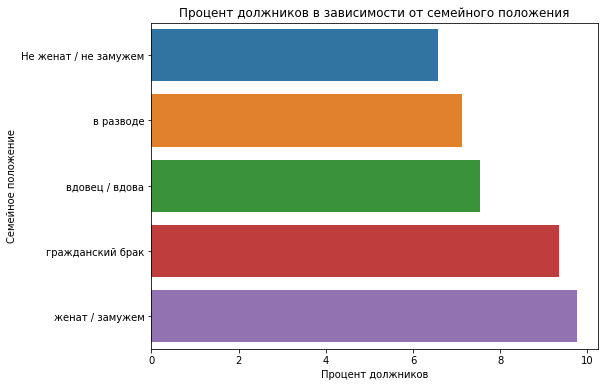

In [56]:
plt.figure(figsize=(8, 6))
sns.barplot(x=family_status_debt['loan_default'], y=family_status_dict['family_status'])
plt.title('Процент должников в зависимости от семейного положения')
plt.xlabel('Процент должников')
plt.ylabel('Семейное положение')
plt.show()

### Процент должников в зависимости от дохода

<div style="border:solid green 2px; padding: 20px">
Процент должников самый высокий в категории заемщиков с самым низким доходом (менее 30 тысяч рублей в месяц).

In [57]:
income_category_debt = credit_worthiness.pivot_table(index='total_income_category', columns='debt', values='days_employed', aggfunc='count')
income_category_debt['loan_default'] = income_category_debt.loc[:, 1] / (income_category_debt.loc[:, 0]+income_category_debt.loc[:, 1]) * 100

income_category_debt = income_category_debt.sort_values('loan_default', ascending=False).reset_index()
income_category_debt

debt,total_income_category,0,1,loan_default
0,E,20,2,9.090909
1,C,14656,1360,8.491508
2,A,23,2,8.000000
3,B,4685,356,7.062091
4,D,329,21,6.000000


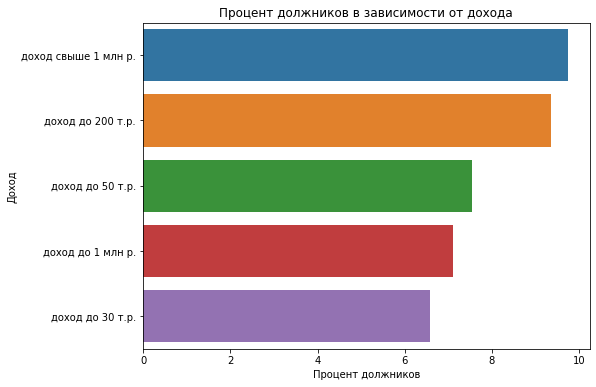

In [58]:
plt.figure(figsize=(8, 6))
sns.barplot(x=family_status_debt['loan_default'],
            y=['доход свыше 1 млн р.',
               'доход до 200 т.р.',
               'доход до 50 т.р.',
               'доход до 1 млн р.',
               'доход до 30 т.р.']
           )
plt.title('Процент должников в зависимости от дохода')
plt.xlabel('Процент должников')
plt.ylabel('Доход')
plt.show()

### Процент должников в зависимости от количества детей

<div style="border:solid green 2px; padding: 20px">
Наибольшее число должников — в категории с четырьмя детьми. Далее идут с двумя и с одним.

In [59]:
children_debt = credit_worthiness.pivot_table(index='children', columns= 'debt', values='days_employed', aggfunc='count')
children_debt['loan_default'] = children_debt.loc[:, 1] / (children_debt.loc[:, 0]+children_debt.loc[:, 1]) * 100
children_debt = children_debt.sort_values('loan_default', ascending=False).reset_index()
children_debt

debt,children,0,1,loan_default
0,4,37.0,4.0,9.756098
1,2,1926.0,202.0,9.492481
2,1,4410.0,445.0,9.165808
3,3,303.0,27.0,8.181818
4,0,13028.0,1063.0,7.543822
5,5,9.0,NaN,NaN


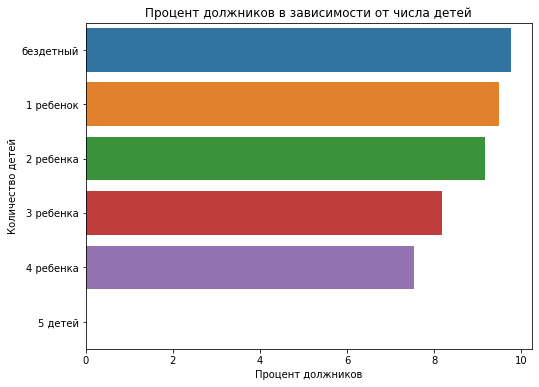

In [61]:
plt.figure(figsize=(8, 6))
sns.barplot(x=children_debt['loan_default'],
            y=['бездетный',
               '1 ребенок',
               '2 ребенка',
               '3 ребенка',
               '4 ребенка',
               '5 детей']
           )
plt.title('Процент должников в зависимости от числа детей')
plt.xlabel('Процент должников')
plt.ylabel('Количество детей')
plt.show()

### Процент должников в зависимости от цели кредита

<div style="border:solid green 2px; padding: 20px">
Наибольший процент задолженности — среди займов на автомобиль. На втором месте — кредит на получение образования.

In [62]:
purpose_debt = credit_worthiness.pivot_table(index='purpose_category', columns= 'debt', values='days_employed', aggfunc='count')
purpose_debt['loan_default'] = purpose_debt.loc[:, 1] / (purpose_debt.loc[:, 0]+purpose_debt.loc[:, 1]) * 100

purpose_debt = purpose_debt.sort_values('loan_default', ascending=False).reset_index()
purpose_debt

debt,purpose_category,0,1,loan_default
0,операции с автомобилем,3903,403,9.359034
1,получение образования,3643,370,9.220035
2,проведение свадьбы,2138,186,8.003442
3,операции с недвижимостью,10029,782,7.233373


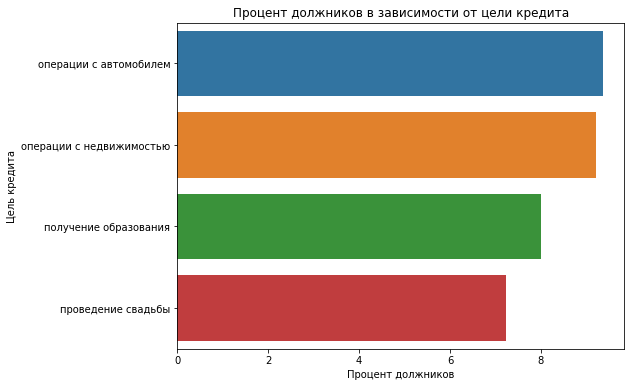

In [63]:
plt.figure(figsize=(8, 6))
sns.barplot(x=purpose_debt['loan_default'],
            y=['операции с автомобилем',
               'операции с недвижимостью',
               'получение образования',
               'проведение свадьбы']
           )
plt.title('Процент должников в зависимости от цели кредита')
plt.xlabel('Процент должников')
plt.ylabel('Цель кредита')
plt.show()

## Общий вывод — "портрет заемщика":

Исходя из проведенного исследования имеющихся данных, можно составить "портрет" **наиболее благонадежного заемщика**.
Это человек:
- собиращийся взять кредит на недвижимость (уровен задолженности среди таких заемщиков около 7%);
- без детей (7,5%);
- с доходом до 50 тыс. рублей (6%);
- вдова/вдовец (6,6%).

И наоборот, **наименее благонадежный заемщик** — это человек:
- просящий займ на автомобиль (процент задолженности среди таких — 9,4%);
- с четырьмя детьми (9,8%);
- с доходом до 30 тыс. рублей (9,1%);
- не женатый/не замужем (9,8%).